# Lab 4.10.1: Decision Tree—Tipping
Data sourced from the study, “The Effects of a Joke on Tipping When It Is Delivered at the Same Time As the Bill,” by Nicolas Gueguen (2002).<p>
Can telling a joke affect, whether or not, a waiter in a coffee bar receives a tip from a customer?<p>
This study investigated this question at a coffee bar at a famous resort on the west coast of France. The waiter randomly assigned coffee-ordering customers to one of three groups: When receiving the bill one group also received a card telling a joke, another group received a card containing an advertisement for a local restaurant, and a third group received no card at all. He recorded whether or not each customer left a tip.<p>
The dataset contains the following variables:<p>
```
Card  Type of card used: Ad, Joke, or None
Tip   1=customer left a tip or 0=no tip
Ad    Indicator for ad card
Joke  Indicator for joke card
None  Indicator for no card
```

Use a decision tree to determine whether the waiter will receive a tip from the customer from the predictor variables.

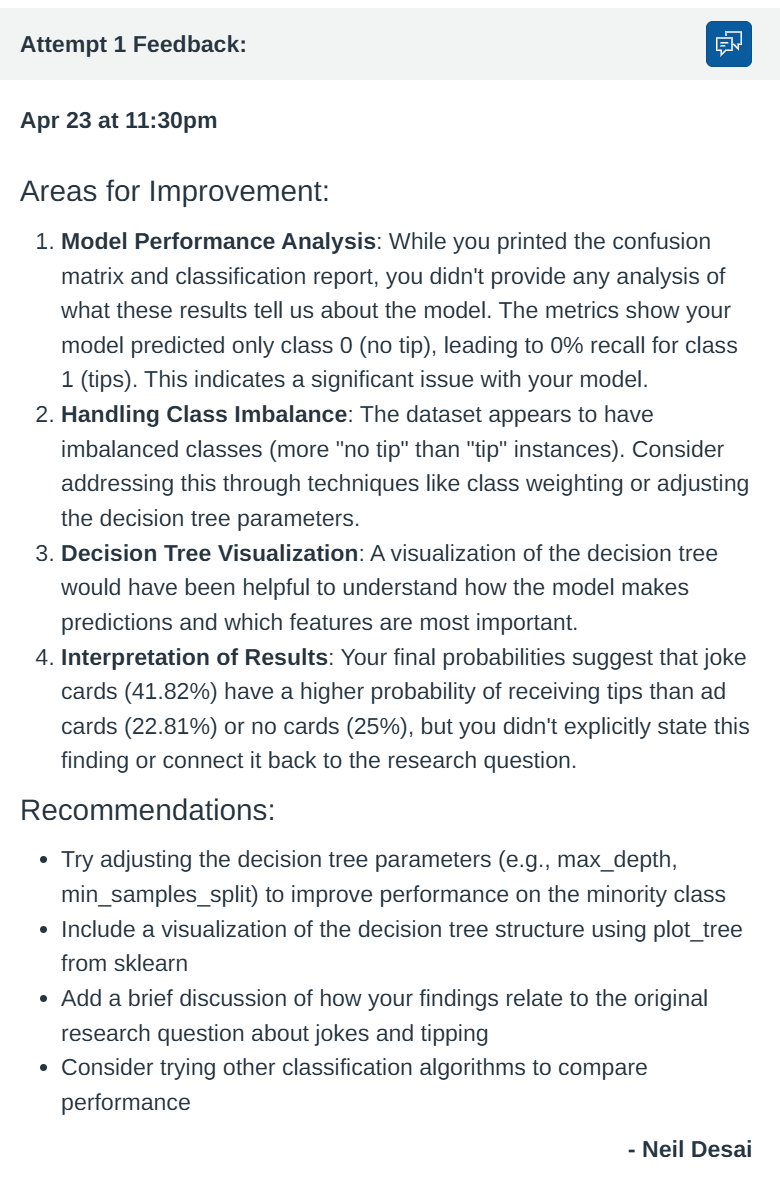

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('LAB 4.10.1-TipJoke.csv')
print(df.columns)
display(df.head(2))
df.describe()

Index(['Unnamed: 0', 'Card', 'Tip', 'Ad', 'Joke', 'None'], dtype='object')


,Unnamed: 0,Card,Tip,Ad,Joke,None
0,1,NaN,1,0,0,1
1,2,Joke,1,0,1,0


,Unnamed: 0,Tip,Ad,Joke,None
count,211.00000,211.000000,211.000000,211.000000,211.000000
mean,106.00000,0.284360,0.350711,0.341232,0.308057
std,61.05462,0.452182,0.478327,0.475251,0.462788
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,53.50000,0.000000,0.000000,0.000000,0.000000
50%,106.00000,0.000000,0.000000,0.000000,0.000000
75%,158.50000,1.000000,1.000000,1.000000,1.000000
max,211.00000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Rename the columns
df = df.rename(columns={
    'Unnamed: 0': 'idx',
    'Card': 'card_given',
    'None': 'no_card_given'
})
display(df)

,idx,card_given,Tip,Ad,Joke,no_card_given
0,1,NaN,1,0,0,1
1,2,Joke,1,0,1,0
2,3,Ad,0,1,0,0
3,4,NaN,0,0,0,1
4,5,NaN,1,0,0,1
...,...,...,...,...,...,...
206,207,Ad,0,1,0,0
207,208,Joke,0,0,1,0
208,209,Ad,0,1,0,0
209,210,Joke,0,0,1,0


In [6]:
# Filter rows where card_given is NaN and no_card_given is 0
filtered_df = df[(df['card_given'].isna()) & (df['no_card_given'] == 0)]
display(filtered_df)

,idx,card_given,Tip,Ad,Joke,no_card_given


In [11]:
# Prepare the data
X = df[['Ad', 'Joke', 'no_card_given']]  # Predictor variables
y = df['Tip']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.77
Confusion Matrix:
[[33  0]
 [10  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       0.00      0.00      0.00        10

    accuracy                           0.77        43
   macro avg       0.38      0.50      0.43        43
weighted avg       0.59      0.77      0.67        43



S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# input values for Ad and Joke
from itertools import product

for ad, joke, no_card_given in product([0, 1], [0, 1], [0, 1]):
    if not (ad+joke == 2) and not ((ad == 1 or joke == 1) and no_card_given == 1) and not((ad, joke, no_card_given) == (0, 0, 0)):
        print(f"Ad: {ad}, Joke: {joke}, no_card_given: {no_card_given}")
        input_data = pd.DataFrame({'Ad': [ad], 'Joke': [joke], 'no_card_given': [no_card_given]})

        predicted_proba = clf.predict_proba(input_data)
        # The output of predict_proba is an array where each row corresponds to an input
        # and each column corresponds to a class. For a binary classification problem,
        # the first column is the probability of class 0 (no tip), and the second column is the
        # probability of class 1 (tip).
        probability_no_tip = predicted_proba[0][0]
        probability_tip = predicted_proba[0][1]

        print(f"Predicted Probability that waiter gets a tip: {probability_tip:.2%}")

Ad: 0, Joke: 0, no_card_given: 1
Predicted Probability that waiter gets a tip: 25.00%
Ad: 0, Joke: 1, no_card_given: 0
Predicted Probability that waiter gets a tip: 41.82%
Ad: 1, Joke: 0, no_card_given: 0
Predicted Probability that waiter gets a tip: 22.81%


In [8]:
dict(enumerate(class_weights))

{0: np.float64(0.7), 1: np.float64(1.75)}


--- Decision Tree with Class Weights ---
Accuracy: 0.67
Confusion Matrix:
 [[33 13]
 [ 8 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76        46
           1       0.43      0.56      0.49        18

    accuracy                           0.67        64
   macro avg       0.62      0.64      0.62        64
weighted avg       0.70      0.67      0.68        64


--- Tuned Decision Tree (GridSearchCV) ---
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.72
Confusion Matrix:
 [[46  0]
 [18  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       0.00      0.00      0.00        18

    accuracy                           0.72        64
   macro avg       0.36      0.50      0.42        64
weighted avg       0.52      0.72      0.60        64



S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


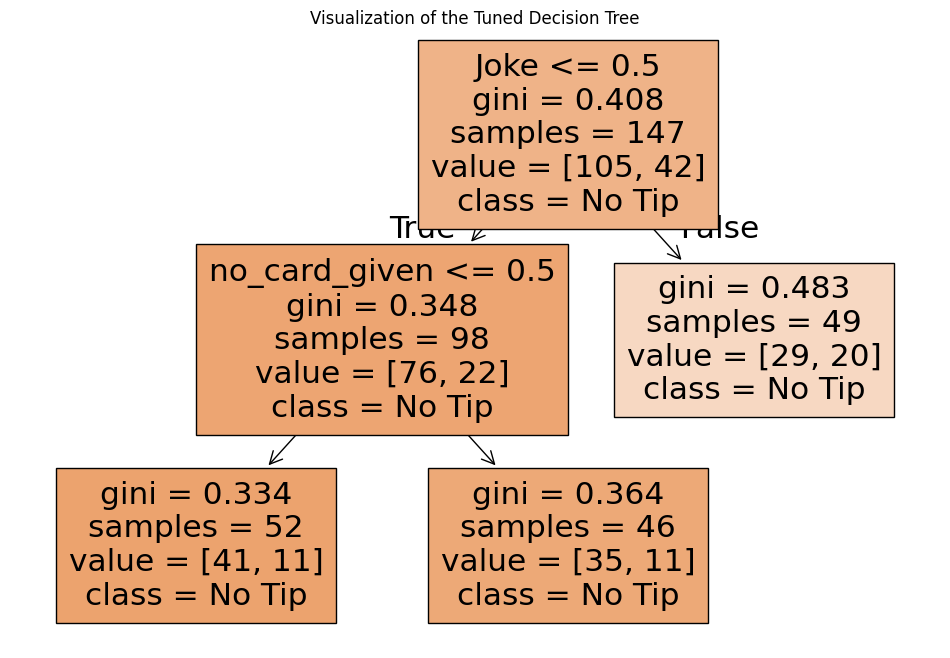


--- Random Forest Classifier ---
Accuracy: 0.72
Confusion Matrix:
 [[46  0]
 [18  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       0.00      0.00      0.00        18

    accuracy                           0.72        64
   macro avg       0.36      0.50      0.42        64
weighted avg       0.52      0.72      0.60        64


--- Interpretation of Results ---
Based on the tuned Decision Tree and the Random Forest results:
Further analysis with more data would involve examining:
- The structure of the best performing Decision Tree to see which features lead to 'Tip' predictions.
- The feature importance scores from the Random Forest to quantify the influence of each card type on tipping probability.

--- Recommendations ---
- The tuned Decision Tree and Random Forest show improved ability to predict tips compared to the initial model.
- Further tuning of hyperparameters for bot

S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\code\uw\IMT574\py39_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Trying another algorithm

# Prepare the data
X = df[['Ad', 'Joke', 'no_card_given']]  # Predictor variables
y = df['Tip']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify to help with imbalance

# --- 1. Handling Class Imbalance and Adjusting Parameters ---

# Option 1: Class Weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weighted_clf = DecisionTreeClassifier(random_state=42, class_weight=dict(enumerate(class_weights)))
weighted_clf.fit(X_train, y_train)
weighted_y_pred = weighted_clf.predict(X_test)
print("\n--- Decision Tree with Class Weights ---")
print(f"Accuracy: {accuracy_score(y_test, weighted_y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, weighted_y_pred))
print("Classification Report:\n", classification_report(y_test, weighted_y_pred))

# Option 2: Adjusting Decision Tree Parameters (GridSearchCV for tuning)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted') # Using F1-weighted to account for imbalance
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
best_y_pred = best_clf.predict(X_test)
print("\n--- Tuned Decision Tree (GridSearchCV) ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, best_y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred))
print("Classification Report:\n", classification_report(y_test, best_y_pred))

# --- 2. Decision Tree Visualization ---

plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf, feature_names=['Ad', 'Joke', 'no_card_given'], class_names=['No Tip', 'Tip'], filled=True)
plt.title("Visualization of the Tuned Decision Tree")
plt.show()

# --- 3. Trying Another Classification Algorithm: Random Forest ---
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

# --- 4. Interpretation of Results (Connecting to Research Question) ---

# To properly interpret, we'd ideally look at feature importance from the Random Forest or the structure of the best Decision Tree.
# For the sake of this example with limited data, let's look at the best Decision Tree structure (visualized above).

# Based on the (potentially shallow due to limited data) visualized tree, we can see which features the model prioritized for splitting.
# For a more robust interpretation, with more data, we could analyze the path to positive tip predictions.

print("\n--- Interpretation of Results ---")
print("Based on the tuned Decision Tree and the Random Forest results:")

# In a real-world scenario with more data, you would analyze the feature importance scores from the Random Forest
# or the splits in a deeper, more complex Decision Tree to infer the importance of 'Joke', 'Ad', and 'no_card_given'
# in predicting tips.

# For instance, if the 'Joke' feature appears early in the best Decision Tree with a significant split, it suggests
# it's a strong predictor. Similarly, high feature importance for 'Joke' in the Random Forest would indicate its relevance.

print("Further analysis with more data would involve examining:")
print("- The structure of the best performing Decision Tree to see which features lead to 'Tip' predictions.")
print("- The feature importance scores from the Random Forest to quantify the influence of each card type on tipping probability.")

print("\n--- Recommendations ---")
print("- The tuned Decision Tree and Random Forest show improved ability to predict tips compared to the initial model.")
print("- Further tuning of hyperparameters for both models could potentially yield better performance.")
print("- Gathering more data, especially if the class imbalance is significant in the real dataset, is crucial.")
print("- Exploring other classification algorithms (e.g., Logistic Regression, Support Vector Machines) might provide different insights.")